<table align="center" width=100%>
    <tr>
        <td width="15%">
            <img src="homework.png">
        </td>
        <td>
            <div align="center">
                <font color="#21618C" size=8px>
                    <b> Take-Home <br>(Day 2)
                    </b>
                </font>
            </div>
        </td>
    </tr>
</table>

#### Import the required libraries

In [37]:
# type your code here
# import 'Pandas' 
import pandas as pd 

# import 'Numpy' 
import numpy as np

# import subpackage of Matplotlib
import matplotlib.pyplot as plt

# import 'Seaborn' 
import seaborn as sns

# to suppress warnings 
from warnings import filterwarnings
filterwarnings('ignore')

# display all columns of the dataframe
pd.options.display.max_columns = None

# display all rows of the dataframe
pd.options.display.max_rows = None
 
# to display the float values upto 6 decimal places     
pd.options.display.float_format = '{:.6f}'.format

# import train-test split 
from sklearn.model_selection import train_test_split

# import various functions from statsmodel to perform linear regression
import statsmodels
import statsmodels.api as sm
import statsmodels.stats.api as sms
from statsmodels.graphics.gofplots import qqplot
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.tsa.api as smt

# import various functions from scipy
from scipy import stats
# import various functions from scipy
from scipy import stats

# import 'metrics' from sklearn is used for evaluating the model performance
from sklearn.metrics import mean_squared_error

# import StandardScaler for scaling the data
from sklearn.preprocessing import StandardScaler

# functions for forward selection

from sklearn.feature_selection import RFE

# functions for linear regression
from sklearn.linear_model import LinearRegression

# functions for  cross validation
from sklearn.model_selection import LeaveOneOut
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn import preprocessing


In [38]:
pip install mlxtend

Note: you may need to restart the kernel to use updated packages.


In [39]:
from mlxtend.feature_selection import SequentialFeatureSelector as sfs

#### Read the data

Load the csv file and print the first five observations.

In [65]:
# type your code here
df_diamond=pd.read_csv('diamond_data.csv')
df_diamond.head()

,carat,cut,color,depth,table,price,x,y,z
0,0.300000,Good,F,61.100000,61.000000,682,4.290000,4.320000,2.630000
1,0.720000,Ideal,H,62.000000,56.000000,2443,5.800000,5.740000,3.580000
2,1.710000,Premium,J,62.900000,58.000000,8848,7.640000,7.580000,4.790000
3,1.010000,Premium,E,59.200000,59.000000,7287,6.670000,6.600000,3.930000
4,0.520000,Ideal,D,62.700000,56.000000,1720,5.170000,5.140000,3.230000


In [41]:
df_diamond.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1547 entries, 0 to 1546
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   carat   1547 non-null   float64
 1   cut     1547 non-null   object 
 2   color   1547 non-null   object 
 3   depth   1547 non-null   float64
 4   table   1547 non-null   float64
 5   price   1547 non-null   int64  
 6   x       1547 non-null   float64
 7   y       1547 non-null   float64
 8   z       1547 non-null   float64
dtypes: float64(6), int64(1), object(2)
memory usage: 108.9+ KB


In [4]:
df_diamond.describe()

,carat,depth,table,price,x,y,z
count,1547.000000,1547.000000,1547.000000,1547.000000,1547.000000,1547.000000,1547.000000
mean,0.791325,61.762185,57.445184,3938.685844,5.713594,5.714460,3.528203
std,0.475814,1.439904,2.235772,4117.039798,1.126730,1.116477,0.693149
min,0.230000,54.600000,52.000000,327.000000,3.860000,3.880000,2.310000
25%,0.400000,61.100000,56.000000,918.000000,4.705000,4.720000,2.910000
50%,0.700000,61.900000,57.000000,2301.000000,5.640000,5.660000,3.500000
75%,1.035000,62.500000,59.000000,5188.000000,6.535000,6.520000,4.030000
max,2.660000,71.800000,70.000000,18803.000000,9.080000,9.010000,5.540000


In [42]:
df_diamond.isnull().sum()

carat    0
cut      0
color    0
depth    0
table    0
price    0
x        0
y        0
z        0
dtype: int64

<AxesSubplot:>

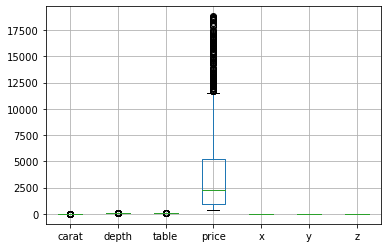

In [6]:
df_diamond.boxplot()

Our objective is to predict the price of the diamond.

In [43]:
df_cat=df_diamond.select_dtypes(include=object)

In [44]:
df_num=df_diamond.select_dtypes(include=np.number)

**The data definition is as follows:** <br>

**carat**: Weight of the diamond

**cut**: Quality of the cut (Fair, Good, Very Good, Premium, Ideal)

**color**: Diamond color

**depth**: Total depth percentage (it is calculated as: 2 * z / (x + y))

**table**: Width of top of the diamond relative to the widest point 

**price**: Price of a diamond in US dollars (target/dependent variable)

**x**: Length of a diamond in mm

**y**: Width of a diamond in mm

**z**: Depth of a diamond in mm

### Let's begin with some hands-on practice exercises

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>1. Is the variable representing the width of a diamond skewed? If yes, apply an appropriate technique to make the distribution less skewed </b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [9]:
# type your code here
df_diamond['y'].skew()

0.4383878452014628

<AxesSubplot:xlabel='y', ylabel='Density'>

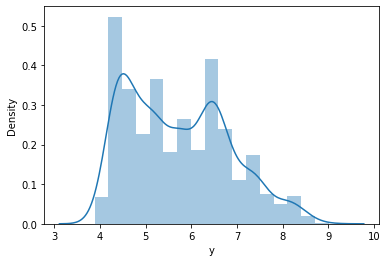

In [10]:
sns.distplot(df_diamond['y'])

In [11]:
df_diamond['y']=np.log(df_diamond['y'])

In [12]:
df_diamond['y'].skew()

0.15322643692701352

<AxesSubplot:xlabel='y', ylabel='Density'>

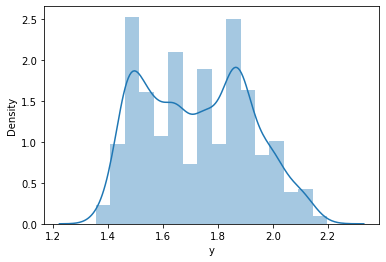

In [13]:
sns.distplot(df_diamond['y'])

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>2. Build a full model and check whether the errors have a serial correlation or not</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [61]:
df_diamond.head()

,carat,cut,color,depth,table,price,x,y,z
0,0.300000,Good,F,61.100000,61.000000,682,4.290000,4.320000,2.630000
1,0.720000,Ideal,H,62.000000,56.000000,2443,5.800000,5.740000,3.580000
2,1.710000,Premium,J,62.900000,58.000000,8848,7.640000,7.580000,4.790000
3,1.010000,Premium,E,59.200000,59.000000,7287,6.670000,6.600000,3.930000
4,0.520000,Ideal,D,62.700000,56.000000,1720,5.170000,5.140000,3.230000


In [46]:
df_diamond.shape

(1547, 9)

In [70]:
df_diamond=pd.get_dummies(df_diamond,columns=['cut','color'],drop_first=True)

In [71]:
X=df_diamond.drop('price',axis=1)
y=df_diamond['price']
X=sm.add_constant(X)
model=sm.OLS(y,X).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.893
Model:                            OLS   Adj. R-squared:                  0.891
Method:                 Least Squares   F-statistic:                     794.4
Date:                Sat, 07 Aug 2021   Prob (F-statistic):               0.00
Time:                        02:45:16   Log-Likelihood:                -13345.
No. Observations:                1547   AIC:                         2.672e+04
Df Residuals:                    1530   BIC:                         2.681e+04
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const         -1.066e+04   8378.089     -1.272

<AxesSubplot:>

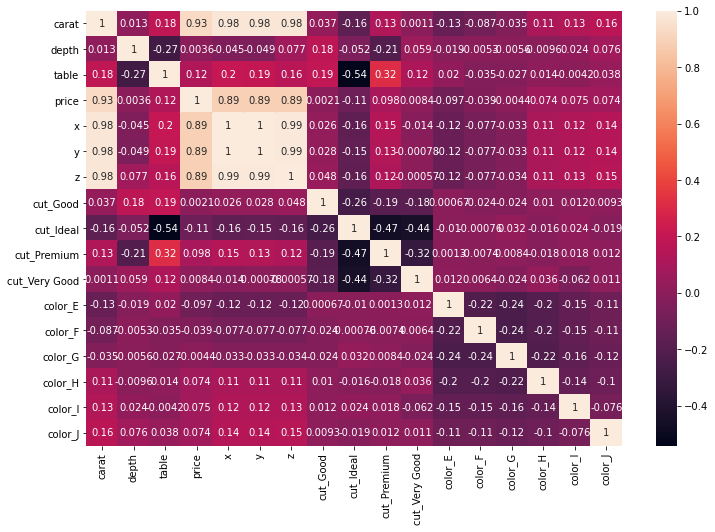

In [40]:
plt.figure(figsize=(12,8))
sns.heatmap(df_diamond.corr(),annot=True)

In [ ]:
#as condition number is large and there is strong correlation between price-carat,price-x,price-y,price-z

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>3. Add the features one-by-one to obtain the set of features which explains the price of a diamond with the highest accuracy
                    </b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [24]:
x=df_diamond.drop('price',axis=1)
X=pd.get_dummies(x,drop_first=True)
y=df_diamond['price']
X=sm.add_constant(X)

In [25]:
clf=LinearRegression()
sfs1=sfs(clf,k_features=8,forward=True,scoring='r2',cv=5,verbose=2)
sfs1.fit(X,y)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  17 out of  17 | elapsed:    0.1s finished

[2021-08-07 01:25:01] Features: 1/8 -- score: 0.8611859711618426[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  16 out of  16 | elapsed:    0.1s finished

[2021-08-07 01:25:01] Features: 2/8 -- score: 0.8701992571397323[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  15 out of  15 | elapsed:    0.0s finished

[2021-08-07 01:25:02] Features: 3/8 -- score: 0.8777650727854528[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 

SequentialFeatureSelector(estimator=LinearRegression(), k_features=8,
                          scoring='r2', verbose=2)

In [59]:
pd.DataFrame(sfs1.subsets_).T

,feature_idx,cv_scores,avg_score,feature_names
1,"(1,)","[0.8762829949804581, 0.8669378259743176, 0.855...",0.861186,"(carat,)"
2,"(1, 6)","[0.8834118629620207, 0.8802461032547032, 0.868...",0.870199,"(carat, z)"
3,"(1, 6, 16)","[0.8913075810938818, 0.886325436421043, 0.8742...",0.877765,"(carat, z, color_J)"
4,"(1, 6, 15, 16)","[0.8871631778975614, 0.8903240744152804, 0.880...",0.880616,"(carat, z, color_I, color_J)"
5,"(1, 3, 6, 15, 16)","[0.8875842536762168, 0.8918173287852081, 0.885...",0.883232,"(carat, table, z, color_I, color_J)"
6,"(1, 3, 6, 14, 15, 16)","[0.8911045141725183, 0.8907896057845885, 0.889...",0.885831,"(carat, table, z, color_H, color_I, color_J)"
7,"(1, 3, 6, 8, 14, 15, 16)","[0.8911153033743009, 0.8918738122339651, 0.889...",0.886088,"(carat, table, z, cut_Ideal, color_H, color_I,..."
8,"(1, 3, 4, 6, 8, 14, 15, 16)","[0.8921105651697747, 0.8926103827717617, 0.890...",0.886665,"(carat, table, x, z, cut_Ideal, color_H, color..."


<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>4. Use the 4-fold cross validation method and compute the coefficient of determination for each model
                    </b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [26]:
# type your code here
LR=LinearRegression()
cv_score=cross_val_score(LR,X,y,cv=4,scoring='r2')

In [27]:
k_fold=KFold(n_splits=4,shuffle=True,random_state=5)
CV_1=cross_val_score(LR,X,y,cv=k_fold,scoring='r2')

In [28]:
cv_score #by directly giving noofsplit

array([0.87701916, 0.90466516, 0.8953416 , 0.86677039])

In [29]:
CV_1 #by using kfold in cross validation.

array([0.89854273, 0.88980734, 0.90174939, 0.8565487 ])

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>5. Identify the most insignificant numerical variable among all the numeric variables in the data
                    </b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [30]:
# type your code here
y=df_diamond['price']
X=sm.add_constant(X)
X=df_diamond.drop('price',axis=1)
f_model=sm.OLS(y,X).fit()
print(f_model.summary())

                                 OLS Regression Results                                
Dep. Variable:                  price   R-squared (uncentered):                   0.944
Model:                            OLS   Adj. R-squared (uncentered):              0.943
Method:                 Least Squares   F-statistic:                              1609.
Date:                Sat, 07 Aug 2021   Prob (F-statistic):                        0.00
Time:                        01:25:14   Log-Likelihood:                         -13345.
No. Observations:                1547   AIC:                                  2.672e+04
Df Residuals:                    1531   BIC:                                  2.681e+04
Df Model:                          16                                                  
Covariance Type:            nonrobust                                                  
                    coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------

In [ ]:
#according to the f_model we can clearly say that the 'color_E' is the most insignificant feature as it has the highest p_value

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>6. Do the residuals obtained from the full model follow a normal distribution?
                    </b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [31]:
# type your code here
f_model.resid.skew()

1.0403127824253127

In [16]:
stat,p_val=stats.shapiro(f_model.resid)
print('p_value :',p_val)

p_value : 9.309036005383286e-37


<AxesSubplot:ylabel='Density'>

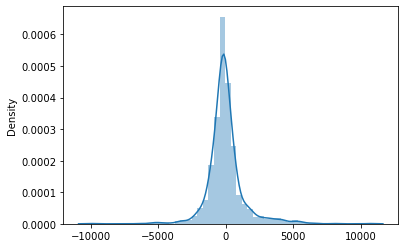

In [17]:
sns.distplot(f_model.resid)

In [ ]:
#residuals are slightly right skewed,p_val<0.05 so we conclide that data is not normal

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>7. Is it possible to make the residuals normal? If yes, do the needful
                    </b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [1]:
# type your code here
yes it is possible to make the residuals normal.

In [33]:
x=np.log(f_model.resid)
x.skew()

-0.7941251193648868

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>8. Consider the full model and remove the variables one-by-one to obtain the set of seven most significant variables
                    </b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [52]:
# type your code here
X=df_diamond.drop('price',axis=1)
y=df_diamond['price']
X=sm.add_constant(X)
f_model=sm.OLS(y,X).fit()
print(f_model.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.893
Model:                            OLS   Adj. R-squared:                  0.891
Method:                 Least Squares   F-statistic:                     794.4
Date:                Sat, 07 Aug 2021   Prob (F-statistic):               0.00
Time:                        01:53:38   Log-Likelihood:                -13345.
No. Observations:                1547   AIC:                         2.672e+04
Df Residuals:                    1530   BIC:                         2.681e+04
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const         -1.066e+04   8378.089     -1.272

In [53]:
rfe=RFE(LR,n_features_to_select=7,verbose=3)
rfe.fit(X,y)

Fitting estimator with 17 features.
Fitting estimator with 16 features.
Fitting estimator with 15 features.
Fitting estimator with 14 features.
Fitting estimator with 13 features.
Fitting estimator with 12 features.
Fitting estimator with 11 features.
Fitting estimator with 10 features.
Fitting estimator with 9 features.
Fitting estimator with 8 features.


RFE(estimator=LinearRegression(), n_features_to_select=7, verbose=3)

In [54]:
pd.DataFrame(rfe.ranking_,index=X.columns,columns=['rank']).sort_values(by='rank')

,rank
color_J,1
carat,1
color_H,1
color_I,1
x,1
y,1
z,1
cut_Ideal,2
cut_Very Good,3
cut_Premium,4


In [ ]:
#color_J,carat,color_H,color_I,x,y,z are the 7 most sgnificant variable.

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>9. Identify the colors of a diamond that are not significant while predicting the price?
                    </b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [66]:
x=df_diamond[['color']]
X=pd.get_dummies(x,drop_first=True)
y=df_diamond['price']
X=sm.add_constant(X)

In [67]:
LR=LinearRegression()
rfe=RFE(LR,n_features_to_select=3,verbose=3)
rfe.fit(X,y)

Fitting estimator with 7 features.
Fitting estimator with 6 features.
Fitting estimator with 5 features.
Fitting estimator with 4 features.


RFE(estimator=LinearRegression(), n_features_to_select=3, verbose=3)

In [68]:
pd.DataFrame(rfe.ranking_,index=X.columns,columns=['rank']).sort_values(by='rank')

,rank
color_H,1
color_I,1
color_J,1
color_E,2
color_G,3
color_F,4
const,5


In [ ]:
#according to the rfe model color_E,color_G,color_F less significant than color_H,color_I,color_J

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>10. Build a regression model on the five features obtained by eliminating the features recursively 
                    </b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [73]:
X=df_diamond.drop('price',axis=1)
y=df_diamond['price']
X=sm.add_constant(X)
f_model=sm.OLS(y,X).fit()

In [74]:
rfe=RFE(LR,n_features_to_select=5,verbose=3)
rfe.fit(X,y)

Fitting estimator with 17 features.
Fitting estimator with 16 features.
Fitting estimator with 15 features.
Fitting estimator with 14 features.
Fitting estimator with 13 features.
Fitting estimator with 12 features.
Fitting estimator with 11 features.
Fitting estimator with 10 features.
Fitting estimator with 9 features.
Fitting estimator with 8 features.
Fitting estimator with 7 features.
Fitting estimator with 6 features.


RFE(estimator=LinearRegression(), n_features_to_select=5, verbose=3)

In [75]:
pd.DataFrame(rfe.ranking_,index=X.columns,columns=['rank']).sort_values(by='rank')

,rank
color_J,1
carat,1
x,1
y,1
z,1
color_I,2
color_H,3
cut_Ideal,4
cut_Very Good,5
cut_Premium,6


In [ ]:
#color_j,carat,x,y,z the 5 most significant features.